## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("train.csv") 
df_comp=raw_csv_data.copy()
df_comp.head()
df_comp.date = pd.to_datetime(df_comp.Date, dayfirst = True)
df_comp.head()

C:\Users\sshre\AppData\Local\Temp\ipykernel_19424\3763393036.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_comp.date = pd.to_datetime(df_comp.Date, dayfirst = True)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
del df_comp['Store']
del df_comp['IsHoliday']
del df_comp['Dept']
data = df_comp[:143]

In [4]:
date_range = pd.date_range(start='2010-02-05', periods=len(data), freq='W')

data["dates"] = date_range
data.set_index("dates", inplace = True)
del data['Date']
data.head()

C:\Users\sshre\AppData\Local\Temp\ipykernel_19424\1042217197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dates"] = date_range


,Weekly_Sales
dates,
2010-02-07,24924.50
2010-02-14,46039.49
2010-02-21,41595.55
2010-02-28,19403.54
2010-03-07,21827.90


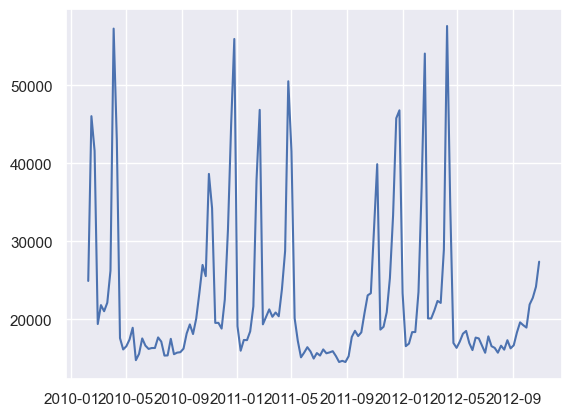

In [5]:
plt.plot(data)
plt.show()

In [6]:
data['market_value'] = data.Weekly_Sales
del data['Weekly_Sales']
data.head()

C:\Users\sshre\AppData\Local\Temp\ipykernel_19424\3943506590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['market_value'] = data.Weekly_Sales


,market_value
dates,
2010-02-07,24924.50
2010-02-14,46039.49
2010-02-21,41595.55
2010-02-28,19403.54
2010-03-07,21827.90


In [7]:
size = int(len(data)*0.8)
df, df_test = data.iloc[:size], data.iloc[size:]

## The LLR Test

In [8]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [9]:
import warnings
warnings.filterwarnings("ignore")

## Creating Returns

In [10]:
df['returns'] = df.market_value.pct_change(1)*100
df_test['returns'] = df_test.market_value.pct_change(1).mul(100)
df_test = df_test.iloc[1:]

## ACF for Returns

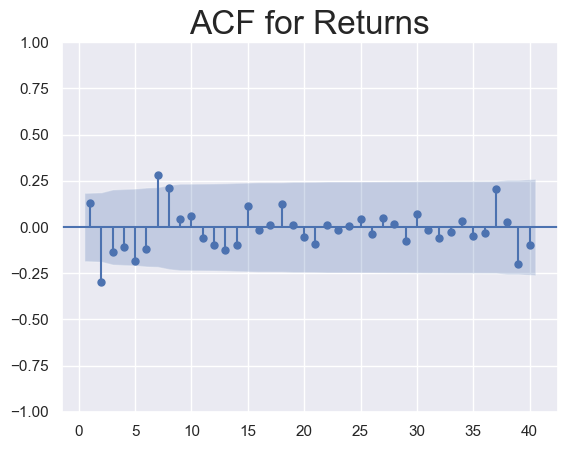

In [11]:
sgt.plot_acf(df.returns[1:], zero = False, lags = 40)
plt.title("ACF for Returns", size=24)
plt.show()

## MA(1) for Returns

In [12]:
model_ret_ma_1 = ARIMA(df.returns[1:], order=(0,0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                  113
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -537.466
Date:                Thu, 20 Jul 2023   AIC                           1080.933
Time:                        02:57:58   BIC                           1089.115
Sample:                    02-14-2010   HQIC                          1084.253
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5487      3.665      1.514      0.130      -1.635      12.733
ma.L1          0.3615      0.069      5.267      0.000       0.227       0.496
sigma2       791.2114     68.044     11.628      0.000     657.847     924.576
===================================================================================
Ljung-Box (L1) (Q):                   1.15   Jarque-Bera (JB):                43.84
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.38
Prob(H) (two-sided):                  0.55   Kurtosis:                         5.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher-Lag MA Models for Returns

In [13]:
model_ret_ma_2 = ARIMA(df.returns[1:], order=(0,0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  113
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -529.425
Date:                Thu, 20 Jul 2023   AIC                           1066.849
Time:                        02:57:58   BIC                           1077.759
Sample:                    02-14-2010   HQIC                          1071.276
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2060      1.838      2.288      0.022       0.604       7.808
ma.L1         -0.0191      0.098     -0.195      0.845      -0.211       0.173
ma.L2         -0.5415      0.113     -4.809      0.0

In [14]:
model_ret_ma_3 = ARIMA(df.returns[1:], order=(0,0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  113
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -527.767
Date:                Thu, 20 Jul 2023   AIC                           1065.534
Time:                        02:57:58   BIC                           1079.171
Sample:                    02-14-2010   HQIC                          1071.068
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1769      1.610      2.594      0.009       1.021       7.333
ma.L1          0.0813      0.113      0.722      0.471      -0.140       0.302
ma.L2         -0.5015      0.124     -4.056      0.0

In [15]:
model_ret_ma_4 = ARIMA(df.returns[1:], order=[0,0,4])
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_3, model_ret_ma_4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  113
Model:                 ARIMA(0, 0, 4)   Log Likelihood                -527.621
Date:                Thu, 20 Jul 2023   AIC                           1067.241
Time:                        02:57:58   BIC                           1083.605
Sample:                    02-14-2010   HQIC                          1073.882
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1509      1.570      2.644      0.008       1.074       7.228
ma.L1          0.0983      0.109      0.904      0.366      -0.115       0.312
ma.L2         -0.4741      0.141     -3.362      0.0

In [16]:
model_ret_ma_5 = ARIMA(df.returns[1:], order=[0,0,5])
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_4, model_ret_ma_5)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  113
Model:                 ARIMA(0, 0, 5)   Log Likelihood                -525.710
Date:                Thu, 20 Jul 2023   AIC                           1065.420
Time:                        02:57:59   BIC                           1084.512
Sample:                    02-14-2010   HQIC                          1073.167
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5040      1.846      2.440      0.015       0.885       8.123
ma.L1          0.0565      0.116      0.486      0.627      -0.171       0.284
ma.L2         -0.6258      0.126     -4.955      0.0

In [17]:
model_ret_ma_6 = ARIMA(df.returns[1:], order=[0,0,6])
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_5, model_ret_ma_6)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  113
Model:                 ARIMA(0, 0, 6)   Log Likelihood                -525.493
Date:                Thu, 20 Jul 2023   AIC                           1066.986
Time:                        02:57:59   BIC                           1088.805
Sample:                    02-14-2010   HQIC                          1075.840
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6884      2.043      2.295      0.022       0.685       8.692
ma.L1          0.0583      0.114      0.513      0.608      -0.165       0.281
ma.L2         -0.6234      0.137     -4.544      0.0

In [18]:
model_ret_ma_7 = ARIMA(df.returns[1:], order=[0,0,7])
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_6, model_ret_ma_7)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  113
Model:                 ARIMA(0, 0, 7)   Log Likelihood                -520.659
Date:                Thu, 20 Jul 2023   AIC                           1059.318
Time:                        02:58:00   BIC                           1083.865
Sample:                    02-14-2010   HQIC                          1069.279
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9810      2.365      2.107      0.035       0.347       9.615
ma.L1         -0.0463      0.108     -0.429      0.668      -0.258       0.166
ma.L2         -0.4044      0.104     -3.880      0.0

In [19]:
model_ret_ma_8 = ARIMA(df.returns[1:], order=[0,0,8])
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_7, model_ret_ma_8)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  113
Model:                 ARIMA(0, 0, 8)   Log Likelihood                -518.915
Date:                Thu, 20 Jul 2023   AIC                           1057.830
Time:                        02:58:00   BIC                           1085.104
Sample:                    02-14-2010   HQIC                          1068.898
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2004      2.707      1.921      0.055      -0.105      10.505
ma.L1          0.0084      0.423      0.020      0.984      -0.821       0.838
ma.L2         -0.5053      0.403     -1.253      0.2

In [20]:
LLR_test(model_ret_ma_6, model_ret_ma_7, DF = 1)

0.002

## PREDICTION AND GRAPHS

In [21]:
pred = results_ret_ma_7.predict(start=len(df), end = len(data) , dynamic = False)

<function matplotlib.pyplot.show(close=None, block=None)>

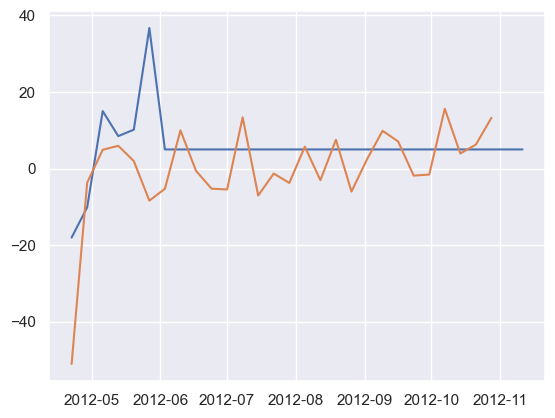

<Figure size 4000x500 with 0 Axes>

In [22]:
plt.plot(pred)
plt.plot(df_test.returns)
plt.figure(figsize=(40,5))
plt.show

## Residuals for Returns

In [23]:
df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]

In [24]:
print("The mean of the residuals is " + str(round(df.res_ret_ma_8.mean(),3)) + "\nThe variance of the residuals is " + str(round(df.res_ret_ma_8.var(),3)))

The mean of the residuals is -0.823
The variance of the residuals is 544.924


In [25]:
round(sqrt(df.res_ret_ma_8.var()),3)

23.344

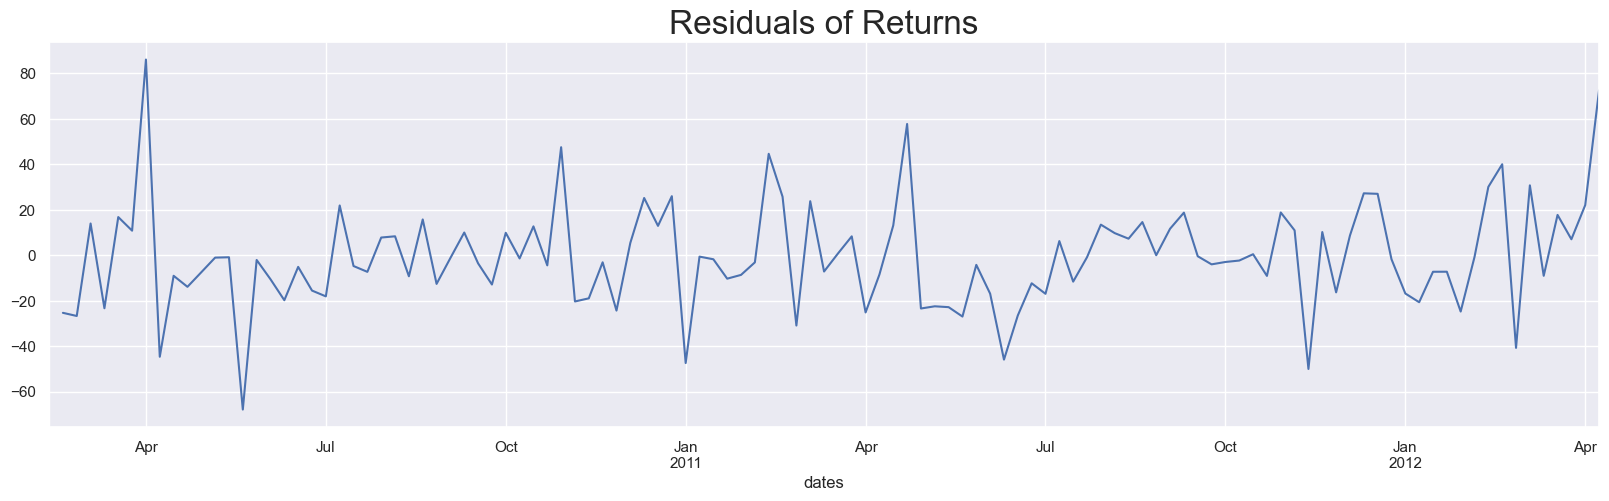

In [26]:
df.res_ret_ma_8[1:].plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24)
plt.show()

In [27]:
sts.adfuller(df.res_ret_ma_8[2:])

(-10.085371126596598,
 1.1591868680733375e-17,
 0,
 111,
 {'1%': -3.490683082754047,
  '5%': -2.8879516565798817,
  '10%': -2.5808574442009578},
 879.7568362341724)

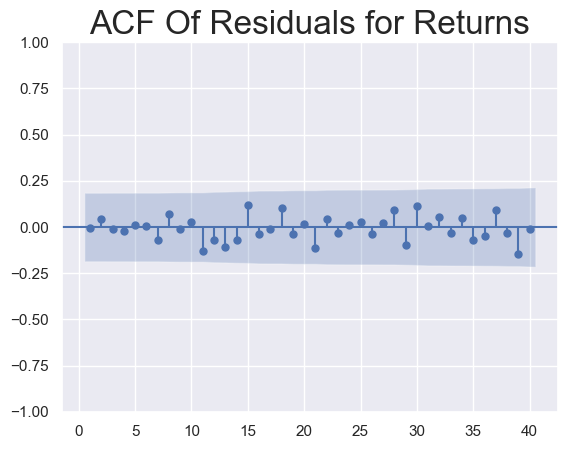

In [28]:
sgt.plot_acf(df.res_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

## Normalized Returns

In [29]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

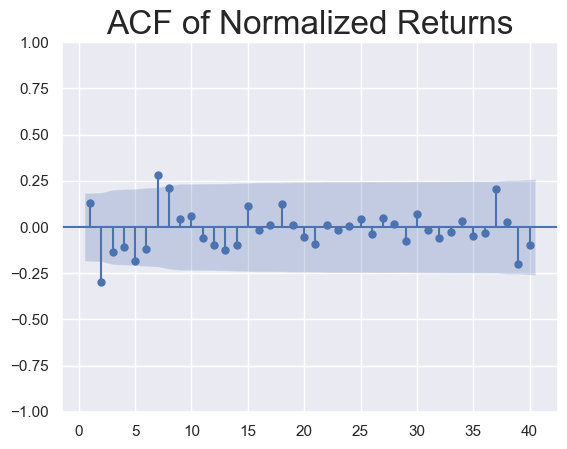

In [30]:
sgt.plot_acf(df.norm_ret[1:], zero = False, lags = 40)
plt.title("ACF of Normalized Returns",size=24)
plt.show()

In [31]:
model_norm_ret_ma_8 = ARIMA(df.norm_ret[1:], order=(0,0,8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
results_norm_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                  113
Model:                 ARIMA(0, 0, 8)   Log Likelihood                -537.659
Date:                Thu, 20 Jul 2023   AIC                           1095.317
Time:                        02:58:03   BIC                           1122.591
Sample:                    02-14-2010   HQIC                          1106.385
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1134      3.192      1.915      0.055      -0.143      12.370
ma.L1          0.0096      0.389      0.025      0.980      -0.754       0.773
ma.L2         -0.5053      0.375     -1.349      0.177      -1.239       0.229
ma.L3         -0.2417      0.124     -1.941      0.052      -0.486       0.002
ma.L4          0.0307      0.169      0.182      0.856      -0.300       0.361
ma.L5          0.0026      0.224      0.012      0.991      -0.436       0.441
ma.L6         -0.0755      0.277     -0.273      0.785      -0.619       0.468
ma.L7          0.4334      0.323      1.343      0.179      -0.199       1.066
ma.L8          0.2837      0.182      1.561      0.119      -0.073       0.640
sigma2       751.6719    293.428      2.562      0.010     176.563    1326.781
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                20.14
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             0.60
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
df['res_norm_ret_ma_8'] = results_ret_ma_8.resid[1:]

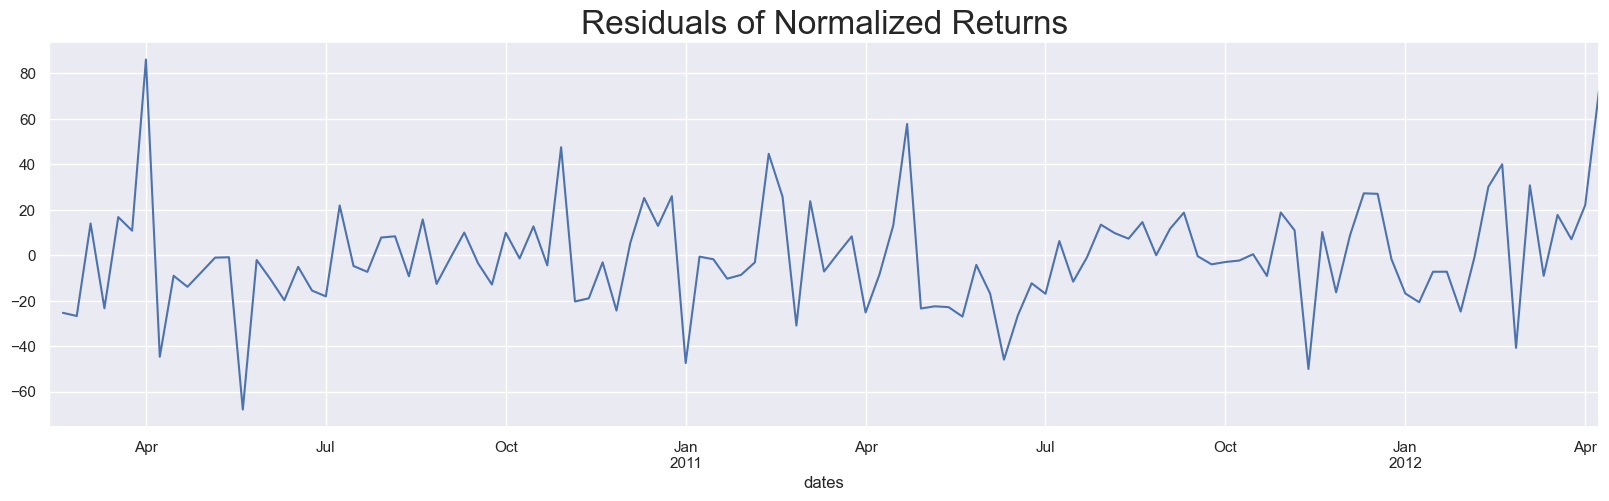

In [33]:
df.res_norm_ret_ma_8[1:].plot(figsize=(20,5))
plt.title("Residuals of Normalized Returns",size=24)
plt.show()

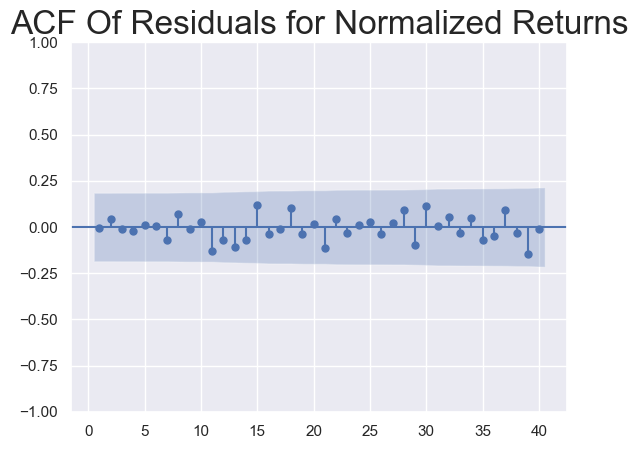

In [34]:
sgt.plot_acf(df.res_norm_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Normalized Returns",size=24)
plt.show()

## MA Models For Prices

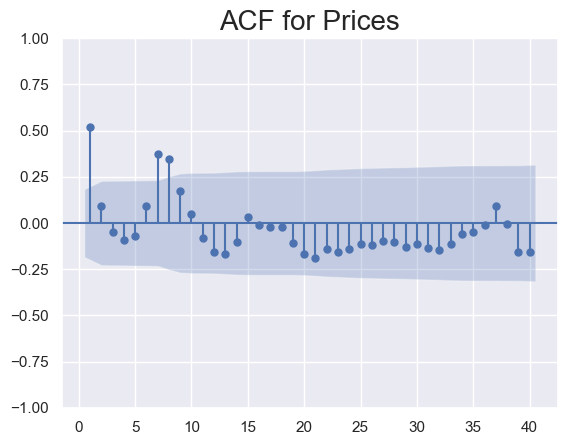

In [35]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size=20)
plt.show()

In [36]:
model_ma_1 = ARIMA(df.market_value, order=(0,0,1))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                  114
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1194.514
Date:                Thu, 20 Jul 2023   AIC                           2395.028
Time:                        02:58:04   BIC                           2403.236
Sample:                    02-07-2010   HQIC                          2398.359
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.347e+04   1548.697     15.152      0.000    2.04e+04    2.65e+04
ma.L1          0.6619      0.079      8.398      0.000       0.507       0.816
sigma2      7.345e+07      0.226   3.24e+08      0.000    7.35e+07    7.35e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.12   Jarque-Bera (JB):                72.51
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                             1.43
Prob(H) (two-sided):                  0.15   Kurtosis:                         5.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.11e+23. Standard errors may be unstable.
"""